<a href="https://colab.research.google.com/github/OkanBagriacik/Energy-Project/blob/main/Machine_Learning_and_Sw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Güneş Enerjisi ve Panel Ayrık Veri Analizi

**Gerekli kütüphaneleri import edelim**

In [ ]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np

**Veri setini ortama aktaralım**

In [ ]:
df = pd.read_csv("turkeyocak.csv")  # Veriyi ortama aktar
print(df.head())  # İlk 5 satırı göster

  Country  Year   Mounth  ...  Weather  SolarPV_Consumption  BelowUnderAvg
0      TR  2006  January  ...        0                 5743              0
1      TR  2006  January  ...        0                 5524              0
2      TR  2006  January  ...        1                 5991              0
3      TR  2006  January  ...        1                 6027              0
4      TR  2006  January  ...        1                 6065              0

[5 rows x 8 columns]


Bize iki bağımlı değişken olan *Panel Count* ve *Weather* ile bağımlı değişken olan *BelowUnderAvg* gerekiyor. Sadece bu kolonlardan oluşan bir *DataFrame* oluşturalım bu *DataFrame*'e data ismini verelim.

Not: *DataFrame*, pandas kütüphanesinde standart olan bir sınıf ismidir. Bir önceki satırda *df* ismine atadığımız veri seti aslında bir DataFrame. Bunu Python'ın type fonksiyonu ile doğrulayabiliriz.

In [ ]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
data = df[["Panel Count", "Weather", "BelowUnderAvg"]]  # İstediğimiz 3 kolondan oluşan bir dataframe 
print(data.head())

   Panel Count  Weather  BelowUnderAvg
0           50        0              0
1           50        0              0
2          100        1              0
3          100        1              0
4          100        1              0


## Karar Ağacı Sınıflandırması

Karar ağaçları parametresi sınıflandırma ve regresyon problemleri için olan gözetimli öğrenme metodudur. Amaç, veri özelliklerinden çıkarılan basit karar kurallarını öğrenerek bir hedef değişkenin değerini tahmin eden bir model oluşturmaktır. Öncelikle, bizim için *Panel Count* ve *Weather* kolonlarına dikkat ederek *BelowUnderAvg* değişkeninin olması gereken değerlerini bulabilen bir model gerekmekte. Bu yüzden modele öğrenmesi gereken veri parçaları olan bağımsız değişkenleri *X*, tahmin etmesi gereken veri parçası olan bağımlı değişkeni ise *Y* isimle değişkenlere atayacağız.


In [ ]:
X = data[["Panel Count", "Weather"]]
Y = data["BelowUnderAvg"]

Şimdi sklearn kütüphanesini kullanarak bir DecisionTreeClassifier (karar ağaç sınıflandırıcı) modeli eğitip sonuçları karşılaştıracağız.

In [ ]:
clf = tree.DecisionTreeClassifier()  # Sınıflandırıcıyı oluşturduk
cl = clf.fit(X, Y)

[Text(133.92000000000002, 181.2, 'X[1] <= 0.5\ngini = 0.458\nsamples = 31\nvalue = [11, 20]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(200.88000000000002, 108.72, 'X[0] <= 75.0\ngini = 0.32\nsamples = 25\nvalue = [5, 20]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.287\nsamples = 23\nvalue = [4, 19]')]

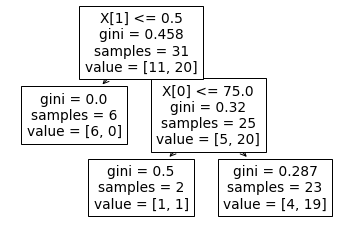

In [ ]:
tree.plot_tree(clf) 

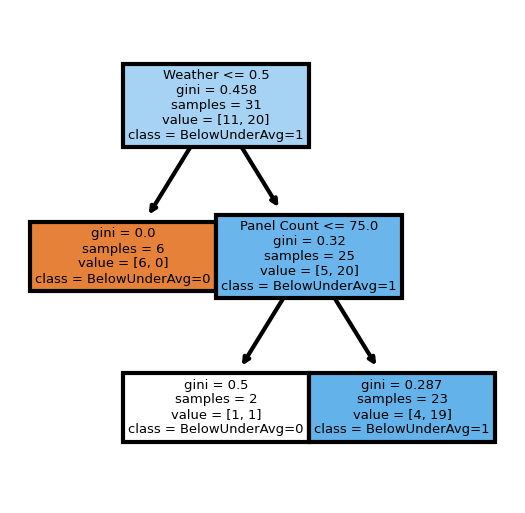

In [ ]:
fn=['Panel Count','Weather']
cn=["BelowUnderAvg=0", "BelowUnderAvg=1"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
tree.plot_tree(clf, feature_names = fn, class_names=cn, filled = True);

In [ ]:
clf.score(X, Y)

0.8387096774193549

In [ ]:
pred = clf.predict(X)

In [ ]:
datam = {'Y':Y.to_numpy(),
        'pred':pred}
  
# Create DataFrame
df_scatter = pd.DataFrame(datam)

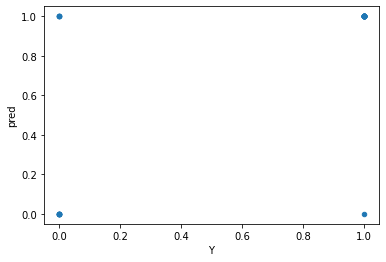

In [ ]:
df_scatter.plot.scatter(x='Y',
                      y='pred')

In [ ]:
df_scatter

,Y,pred
0,0,0
1,0,0
2,0,1
3,0,1
4,0,1
5,0,0
6,0,0
7,0,0
8,0,0
9,1,1


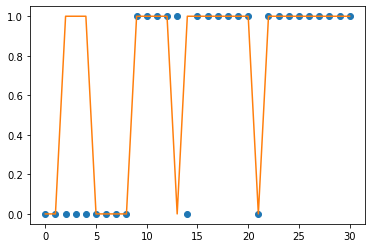

In [ ]:
# import pandas module for data analysis
import pandas as pd
# import seaborn and matplot library for visualization
import seaborn as sns  
import matplotlib.pyplot as plt

x = df_scatter["Y"]
y = df_scatter["pred"]

plt.plot(x,"o")
plt.plot(y)

plt.show()

## Daha basit yaklaşım

Soruna daha basit bir şekilde yaklaşmamız gerekirse kural tabanlı bir sistem oluşturabiliriz. Şöyleki, eğer panel sayısı 50 (PanelCount) ve hava kapalıysa (Weather=0), BelowUnderAvg değerinin 0 olması beklenir. Diğer durum ise panel sayısı 100, hava güneşli ise (Weather=1), BelowUnderAvg değerinin 1 olması beklenir. 

Panel sayısı 50 ve hava kapalıyken üretimi ortalamanın üstünde (aykırı durum)

In [ ]:
data[(data["Panel Count"] <= 50) & ( data["Weather"] == 0) & (data["BelowUnderAvg"] == 1)]

,Panel Count,Weather,BelowUnderAvg


Panel sayısı 50 ve hava kapalıyken üretimi ortalamanın altında (beklenen durum)

In [ ]:
data[(data["Panel Count"] <= 50) & ( data["Weather"] == 0) & (data["BelowUnderAvg"] == 0)]

,Panel Count,Weather,BelowUnderAvg
0,50,0,0
1,50,0,0
6,50,0,0
7,50,0,0


Panel sayısı 50 ve hava açık iken üretimi ortalamanın üstünde olan

In [ ]:
data[(data["Panel Count"] <= 50) & ( data["Weather"] == 1) & (data["BelowUnderAvg"] == 1)]

,Panel Count,Weather,BelowUnderAvg
13,50,1,1


Panel sayısı 50 ve hava açık iken üretimi ortalamanın altında olan

In [ ]:
data[(data["Panel Count"] <= 50) & ( data["Weather"] == 1) & (data["BelowUnderAvg"] == 0)]

,Panel Count,Weather,BelowUnderAvg
5,50,1,0


Panel sayısı 100 ve hava kapalı iken üretim ortalamanın üstünde (aykırı durum)

In [ ]:
data[(data["Panel Count"] > 50) & ( data["Weather"] == 0) & (data["BelowUnderAvg"] == 1)]

,Panel Count,Weather,BelowUnderAvg


Panel sayısı 100 ve hava kapalı iken üretim ortalamanın altında (beklenen durum)

In [ ]:
data[(data["Panel Count"] > 50) & ( data["Weather"] == 0) & (data["BelowUnderAvg"] == 0)]

,Panel Count,Weather,BelowUnderAvg
8,100,0,0
21,100,0,0


Panel sayısı 100 ve hava açık iken üretim ortalamanın üstünde (beklenen durum)

In [ ]:
data[(data["Panel Count"] > 50) & (data["Weather"] == 1) & (data["BelowUnderAvg"] == 1)]

,Panel Count,Weather,BelowUnderAvg
9,100,1,1
10,100,1,1
11,100,1,1
12,100,1,1
15,100,1,1
16,100,1,1
17,100,1,1
18,100,1,1
19,100,1,1
20,100,1,1


Panel sayısı 100 ve hava açık iken üretim ortalamanın altında (aykırı durum) 

In [ ]:
data[(data["Panel Count"] > 50) & (data["Weather"] == 1) & (data["BelowUnderAvg"] == 0)]


,Panel Count,Weather,BelowUnderAvg
2,100,1,0
3,100,1,0
4,100,1,0
14,100,1,0


In [ ]:
data["merged"] = data["Panel Count"].astype(str) + data["Weather"].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df["mean"] = df["SolarPV_Consumption"].mean()

In [ ]:
df['under'] = (np.where(df['Panel Count'] == 100, 1, 0) & np.where(df['Weather'] == 1, 1, 0) & np.where(df['BelowUnderAvg'] == 1, 1, 0))|(np.where(df['Panel Count'] == 100, 1, 0) & np.where(df['Weather'] == 0, 1, 0) & np.where(df['BelowUnderAvg'] == 0, 1, 0))|(np.where(df['Panel Count'] == 50, 1, 0) & np.where(df['Weather'] == 0, 1, 0) & np.where(df['BelowUnderAvg'] == 0, 1, 0))|(np.where(df['Panel Count'] == 50, 1, 0) & np.where(df['Weather'] == 1, 1, 0) & np.where(df['BelowUnderAvg'] == 1, 1, 0))

In [ ]:
df

,Country,Year,Mounth,Day,Panel Count,Weather,SolarPV_Consumption,BelowUnderAvg,mean,under
0,TR,2006,January,1,50,0,5743,0,6367.354839,1
1,TR,2006,January,2,50,0,5524,0,6367.354839,1
2,TR,2006,January,3,100,1,5991,0,6367.354839,0
3,TR,2006,January,4,100,1,6027,0,6367.354839,0
4,TR,2006,January,5,100,1,6065,0,6367.354839,0
5,TR,2006,January,6,50,1,5936,0,6367.354839,0
6,TR,2006,January,7,50,0,5610,0,6367.354839,1
7,TR,2006,January,8,50,0,5550,0,6367.354839,1
8,TR,2006,January,9,100,0,5892,0,6367.354839,1
9,TR,2006,January,10,100,1,6508,1,6367.354839,1


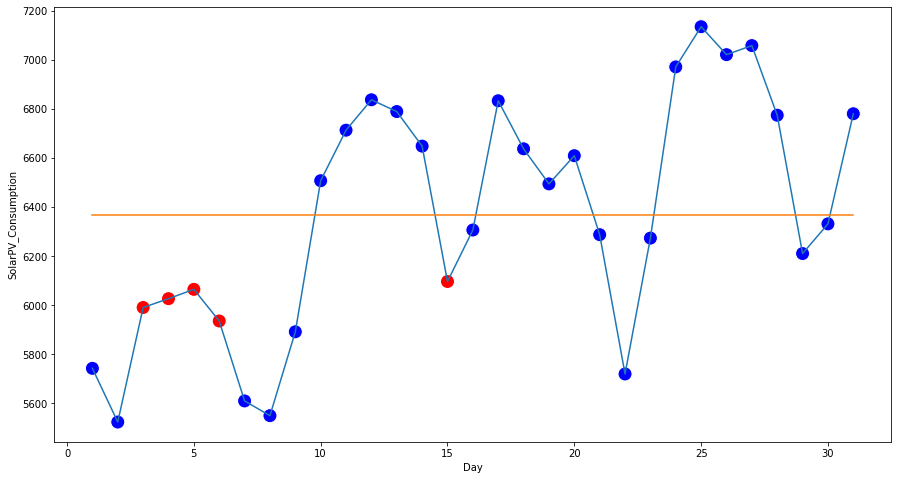

In [ ]:
# import pandas module for data analysis
import pandas as pd
# import seaborn and matplot library for visualization
import seaborn as sns  
import matplotlib.pyplot as plt


df["val"] = df['under'].apply(lambda x: "red" if x==0 else "blue")
not_red_df = df.loc[df['val'] != 'red']
red_df = df.loc[df['val'] == 'red']
plt.figure(figsize = (15,8)) 
sns.lineplot(x = "Day", y = "SolarPV_Consumption", data = df)
sns.lineplot(x = "Day", y = "mean", data = df )

sns.scatterplot(x=not_red_df["Day"], y=not_red_df["SolarPV_Consumption"], c=not_red_df["val"], s=200)
sns.scatterplot(x=red_df["Day"], y=red_df["SolarPV_Consumption"], c=red_df["val"], s=200)


plt.show()

